In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", path)

Path to dataset files: /Users/sohumgautam/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1


In [19]:
import kagglehub
import os
import shutil

# Download the latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")
print(path)
print(os.listdir(path))

# Ensure target directory exists
os.makedirs("./data/images", exist_ok=True)

# Move each file inside the 'Images' folder individually
images_folder = os.path.join(path, "Images")
for filename in os.listdir(images_folder):
    src_file = os.path.join(images_folder, filename)
    dst_file = os.path.join("./data/images", filename)
    shutil.move(src_file, dst_file)

# Move captions file
shutil.move(os.path.join(path, "captions.txt"), "./data/text.csv")

/Users/sohumgautam/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1
['captions.txt', 'Images']


'./data/text.csv'

In [6]:
import kagglehub
import os
import shutil

# Download dataset
path = kagglehub.dataset_download("adityajn105/flickr8k")
print("Downloaded path:", path)

# See what's inside
for root, dirs, files in os.walk(path):
    print("DIR:", root)
    for d in dirs:
        print("  Subdir:", d)
    for f in files:
        print("  File:", f)


Downloaded path: /Users/sohumgautam/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1
DIR: /Users/sohumgautam/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1


In [7]:
print(os.listdir(path))


[]


Important note: The images and texts are not ordered the same 

In [11]:
print(path)
image_path = os.listdir(path)

/Users/sohumgautam/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1


In [31]:
print(len(os.listdir(os.path.join(path, "Images"))))
#This adds images onto the path
images_path = os.path.join(path, "Images")
print(images_path)

8091
/Users/sohumgautam/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1/Images


In [29]:
caption_path = os.path.join(path, "captions.txt")
print(caption_path)

with open(caption_path, 'r') as f:
    contents = f.read()
    captions = contents

print(captions)

/Users/sohumgautam/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1/captions.txt
image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .
1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .
1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .
1002674143_1b742ab4b8.jpg,A little girl covered in

/Users/sohumgautam/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1/Images/1000268201_693b08cb0e.jpg
(375, 500)


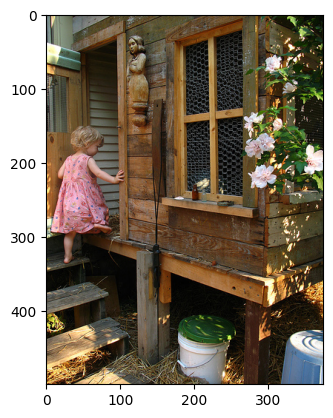

In [37]:
img_num = 1
img_path = os.path.join(images_path, "1000268201_693b08cb0e.jpg")
print(img_path)

image = Image.open(img_path)
print(image.size)
plt.imshow(image)

In [42]:
def get_captions_for_image(image_filename):
    captions_df = pd.read_csv(caption_path)
    
    image_captions = captions_df[captions_df['image'] == image_filename]
    
    # Return all captions for this image
    return image_captions['caption'].tolist()

# Example usage
captions = get_captions_for_image("1000268201_693b08cb0e.jpg")

# Print all captions
print(f"Found {len(captions)} captions for image {image_path}:")

for i, caption in enumerate(captions, 1):
    print(f"Caption {i}: {caption}") 

Found 5 captions for image 1009434119_febe49276a.jpg:
Caption 1: A child in a pink dress is climbing up a set of stairs in an entry way .
Caption 2: A girl going into a wooden building .
Caption 3: A little girl climbing into a wooden playhouse .
Caption 4: A little girl climbing the stairs to her playhouse .
Caption 5: A little girl in a pink dress going into a wooden cabin .
